In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
# generate a toy dataset
X, y = make_classification(n_samples=90000, n_features=52, random_state=42)
print("Dataset shape:", X.shape, y.shape)

Dataset shape: (90000, 52) (90000,)


In [4]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# create a random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
# train the random forest classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [8]:
# evaluate the accuracy of the model
accuracy = rf_classifier.score(X_test, y_test)
print(f"Random Forest classifier accuracy: {accuracy}")

Random Forest classifier accuracy: 0.9382592592592592


Text(0.5, 1.0, 'Actual vs Predicted')

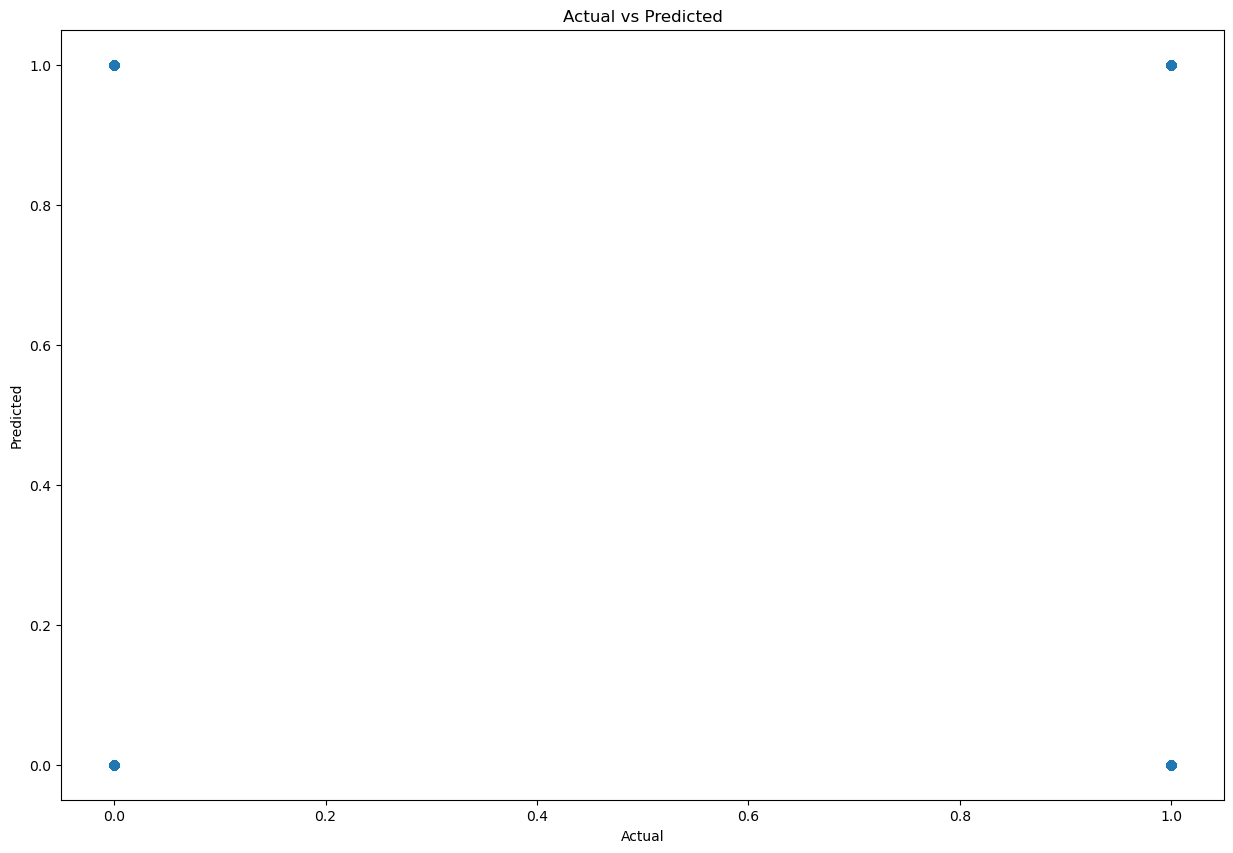

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### What if we use decision tree regression?


In [10]:
from sklearn.tree import DecisionTreeRegressor
# Define model. Specify a number for random_state to ensure same results each run
mtr = DecisionTreeRegressor(random_state=1)

# Fit model
mtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [11]:
# Make predictions on the test data
y_pred = mtr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
# Evaluate the performance of the model using R^2 score
r2 = mtr.score(X_test, y_test)
print("R^2 score: {:.2f}".format(r2))

R^2 score: 0.60


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


predicted = mtr.predict(X_test)
rmse = mean_squared_error(y_test, predicted, squared=False)
print("rmse: {}".format(rmse))

val_mae = mean_absolute_error(y_test, predicted)

# uncomment following line to see the validation_mae
print('mae :{}'.format(val_mae))


r2 = r2_score(y_test, predicted)
print('r2: {}'.format(r2))
print(y_test)

rmse: 0.31546555837130386
mae :0.09951851851851852
r2: 0.601925923741706
[1 0 0 ... 1 1 0]


Text(0.5, 1.0, 'Actual vs Predicted')

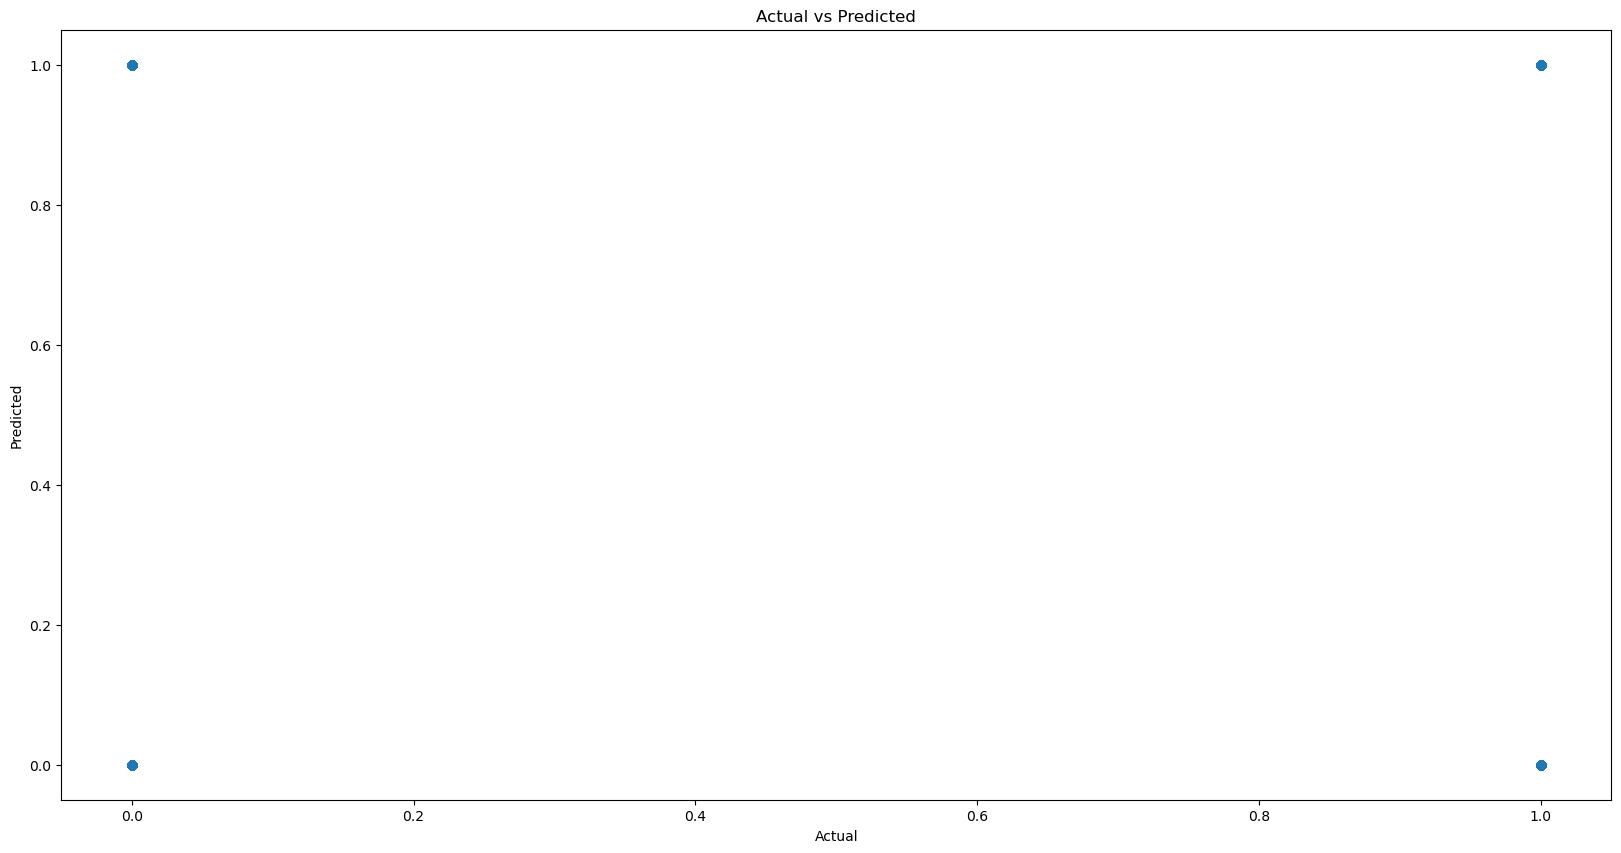

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### DecisionTreeRegression shows significant less accurate evaluation for large dataset containing 90000 rows. Need to figure out why is that

#### What if we use linear regression?

### What if we use more arguments in make_classification?

In [15]:
# Generate a dataset with more diverse features
XX, yy = make_classification(n_samples=90000, n_features=52, n_informative=8,
                           n_redundant=2, n_classes=3, class_sep=2.0,
                           weights=[0.3, 0.3, 0.4], random_state=42)
print('Dataset shape:',XX.shape,yy.shape)

Dataset shape: (90000, 52) (90000,)


In [16]:
# split the dataset into training and testing sets
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)
# create a random forest classifier object
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# train the random forest classifier on the training data
rfc_classifier.fit(XX_train, yy_train)
# make predictions on the test data
yy_pred = rfc_classifier.predict(XX_test)
# evaluate the accuracy of the model
accuracy_2 = rfc_classifier.score(XX_test, yy_test)
print(f"Random Forest classifier accuracy: {accuracy_2}")

Random Forest classifier accuracy: 0.9832222222222222


Text(0.5, 1.0, 'Actual vs Predicted')

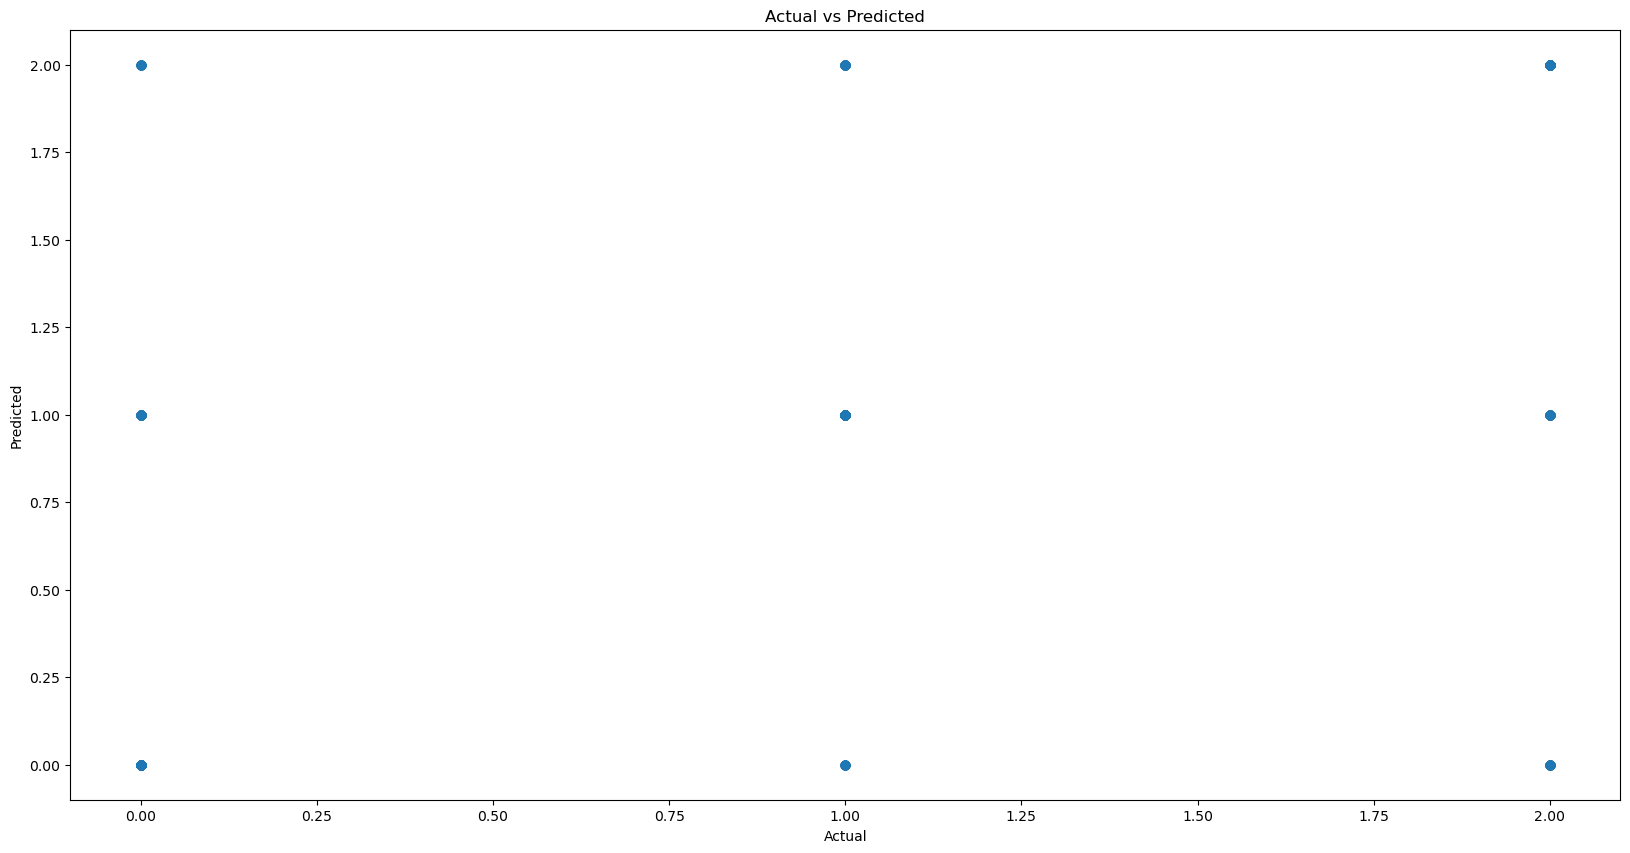

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.scatter(yy_test, yy_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')